In [22]:
pip install obsei dateparser

In [ ]:
# code credit - Lalit Pagaria - https://github.com/obsei/obsei/blob/master/example/youtube_scrapper_example.py

# import logging
# import sys

![](https://raw.githubusercontent.com/obsei/obsei-resources/master/images/Obsei_diagram.png)

In [23]:
from obsei.source import YoutubeScrapperSource, YoutubeScrapperConfig


from obsei.analyzer.classification_analyzer import (
    ClassificationAnalyzerConfig,
    ZeroShotClassificationAnalyzer,
)


In [ ]:

# logger = logging.getLogger(__name__)
# logging.basicConfig(stream=sys.stdout, level=logging.INFO)


In [24]:
video_url = 'https://www.youtube.com/watch?v=5zOHSysMmH0'

In [25]:
source_config = YoutubeScrapperConfig(
    video_url= video_url,
    fetch_replies=False,
    max_comments=20,
    lookup_period="1Y",
)


In [26]:
source = YoutubeScrapperSource()

source_response_list = source.lookup(source_config)

In [27]:

for idx, source_response in enumerate(source_response_list):
    print(f"source_response#'{idx}'='{source_response.__dict__}'")


source_response#'0'='{'segmented_data': {}, 'meta': {'comment_id': 'UgwMriIvz7jk8BZBh7t4AaABAg', 'text': 'Here are the timestamps. Please check out our sponsors below to support this podcast.\n0:00 - Introduction & sponsor mentions:\n5:36 - Metaverse\n25:36 - Identity in Metaverse\n37:45 - Security\n42:10 - Social Dilemma\n1:04:16 - Instagram whistleblower\n1:09:01 - Social media and mental health\n1:14:26 - Censorship\n1:31:35 - Translation\n1:39:10 - Advice for young people\n1:44:58 - Daughters\n1:47:46 - Mortality\n1:52:19 - Question for God\n1:55:25 - Meaning of life\n\nSponsors:\n- Paperspace: https://gradient.run/lex to get $15 credit\n- Coinbase: https://coinbase.com/lex to get $5 in free Bitcoin\n- InsideTracker: https://insidetracker.com/lex and use code Lex25 to get 25% off\n- ExpressVPN: https://expressvpn.com/lexpod and use code LexPod to get 3 months free\n- Blinkist: https://blinkist.com/lex and use code LEX to get 25% off premium', 'time': datetime.datetime(2022, 2, 26, 

In [28]:

text_analyzer = ZeroShotClassificationAnalyzer(
    model_name_or_path="typeform/mobilebert-uncased-mnli", device="auto"
)


Downloading:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/94.2M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [29]:

analyzer_response_list = text_analyzer.analyze_input(
    source_response_list=source_response_list,
    analyzer_config=ClassificationAnalyzerConfig(
        labels=["positive", "negative"],
    ),
)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [30]:
for idx, an_response in enumerate(analyzer_response_list):
    print(f"analyzer_response#'{idx}'='{an_response.__dict__}'")

analyzer_response#'0'='{'segmented_data': {'classifier_data': {'positive': 0.8109017014503479, 'negative': 0.006348629016429186}}, 'meta': {'comment_id': 'UgwMriIvz7jk8BZBh7t4AaABAg', 'text': 'Here are the timestamps. Please check out our sponsors below to support this podcast.\n0:00 - Introduction & sponsor mentions:\n5:36 - Metaverse\n25:36 - Identity in Metaverse\n37:45 - Security\n42:10 - Social Dilemma\n1:04:16 - Instagram whistleblower\n1:09:01 - Social media and mental health\n1:14:26 - Censorship\n1:31:35 - Translation\n1:39:10 - Advice for young people\n1:44:58 - Daughters\n1:47:46 - Mortality\n1:52:19 - Question for God\n1:55:25 - Meaning of life\n\nSponsors:\n- Paperspace: https://gradient.run/lex to get $15 credit\n- Coinbase: https://coinbase.com/lex to get $5 in free Bitcoin\n- InsideTracker: https://insidetracker.com/lex and use code Lex25 to get 25% off\n- ExpressVPN: https://expressvpn.com/lexpod and use code LexPod to get 3 months free\n- Blinkist: https://blinkist.co

In [31]:
from pandas import DataFrame
from obsei.sink.pandas_sink import PandasSink, PandasSinkConfig

sink_config = PandasSinkConfig(
   dataframe=DataFrame()
)
sink = PandasSink()

In [32]:


dataframe = sink.send_data(analyzer_response_list, sink_config)


In [33]:
dataframe

,processed_text,segmented_data_classifier_data_positive,segmented_data_classifier_data_negative,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name
0,Here are the timestamps. Please check out our ...,0.81,0.01,UgwMriIvz7jk8BZBh7t4AaABAg,Here are the timestamps. Please check out our ...,2022-02-26 17:35:53.665973+00:00,Lex Fridman,UCSHZKyawb77ixDdsGog4iWA,390,https://yt3.ggpht.com/ytc/AKedOLRFlH5XnTHG1Qcz...,False,YoutubeScrapper
1,Legend lex,0.63,0.73,Ugwv_xL4G0VAciQML0V4AaABAg,Legend lex,2022-02-26 21:35:44.668211+00:00,Tim Chapman,UCHOmAMnuOYQ5mlIKzbMwHdw,0,https://yt3.ggpht.com/ytc/AKedOLTBZp3EV4rmajI8...,False,YoutubeScrapper
2,"no blazer quite yet for zuck, but he did opt f...",0.26,0.72,Ugz77792XLqrE1Bombp4AaABAg,"no blazer quite yet for zuck, but he did opt f...",2022-02-26 21:35:44.669870+00:00,Stephan Ott,UCkmwoJUpTEBAZEVVyAr2wQQ,1,https://yt3.ggpht.com/ytc/AKedOLST2LYx-aMH9eAr...,False,YoutubeScrapper
3,When robots collide. 👾🤖💥,0.45,0.22,Ugx5q8bkFQGj90blf6N4AaABAg,When robots collide. 👾🤖💥,2022-02-26 21:35:41.671381+00:00,Lulu Moon,UCNVgjRK0RvQhq2aM9Cn5KPQ,0,https://yt3.ggpht.com/ytc/AKedOLQcabvBTxzJJbOs...,False,YoutubeScrapper
4,I have to pinch myself! Is this really happeni...,0.00,0.82,UgxGeOUl4ebd0jcMktB4AaABAg,I have to pinch myself! Is this really happeni...,2022-02-26 21:35:34.672828+00:00,4SH0,UC5w4wO4t1oJR5IUg0L3sh1g,0,https://yt3.ggpht.com/ytc/AKedOLSyZpYw7kDJremP...,False,YoutubeScrapper
5,"Would be cool to see a trio episode like lex, ...",0.68,0.00,UgwjGdub-Qx9n9Mdf914AaABAg,"Would be cool to see a trio episode like lex, ...",2022-02-26 21:35:33.674343+00:00,Volodymyr Pylypiv,UCIMFqE7koFJUu45Xc3LkvOA,0,https://yt3.ggpht.com/ytc/AKedOLQUSqF-E_XYW_QH...,False,YoutubeScrapper
6,"Lex, be careful interviewing Putin. He might m...",0.00,0.59,UgxsBM3mn1Pl9Lu7t4p4AaABAg,"Lex, be careful interviewing Putin. He might m...",2022-02-26 21:35:28.675966+00:00,Eugene Putin,UCC-gK4fK56BKG1_Ui3yhDvg,0,https://yt3.ggpht.com/ytc/AKedOLRgLt7JCQqOHvNX...,False,YoutubeScrapper
7,"Lex Luther summoned Satan out of the Lair, Im ...",0.03,0.90,UgyWbNenxGEU9Itq8XR4AaABAg,"Lex Luther summoned Satan out of the Lair, Im ...",2022-02-26 21:35:27.677469+00:00,Nico C.,UCHTngimevTkNxgVkpDrxy0A,1,https://yt3.ggpht.com/ytc/AKedOLQE0ijp9BIYEX4h...,False,YoutubeScrapper
8,What is the process of getting an interview wi...,0.04,0.40,UgxbxC4eQAfCGf9dlgV4AaABAg,What is the process of getting an interview wi...,2022-02-26 21:35:11.682236+00:00,SUPRATIK SARKAR,UCWpMqcvXsqdLBgM7Y1lOO3g,0,https://yt3.ggpht.com/ytc/AKedOLTg4dXDFmJp0-iu...,False,YoutubeScrapper
9,Thank you Lex. Your podcast is an absolute gem.,1.00,0.00,Ugy64Arg8dWKARHWsr14AaABAg,Thank you Lex. Your podcast is an absolute gem.,2022-02-26 21:35:08.685262+00:00,NeverNotClimbing,UCNL4AqzIzDqi_OS-RKGyYYw,0,https://yt3.ggpht.com/wqCvSYKps6dOaclDXbO-PF44...,False,YoutubeScrapper


In [34]:
import pandas as pd

In [35]:
dataframe.loc[dataframe['segmented_data_classifier_data_negative'].astype('float')>0.5]

,processed_text,segmented_data_classifier_data_positive,segmented_data_classifier_data_negative,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name
1,Legend lex,0.63,0.73,Ugwv_xL4G0VAciQML0V4AaABAg,Legend lex,2022-02-26 21:35:44.668211+00:00,Tim Chapman,UCHOmAMnuOYQ5mlIKzbMwHdw,0,https://yt3.ggpht.com/ytc/AKedOLTBZp3EV4rmajI8...,False,YoutubeScrapper
2,"no blazer quite yet for zuck, but he did opt f...",0.26,0.72,Ugz77792XLqrE1Bombp4AaABAg,"no blazer quite yet for zuck, but he did opt f...",2022-02-26 21:35:44.669870+00:00,Stephan Ott,UCkmwoJUpTEBAZEVVyAr2wQQ,1,https://yt3.ggpht.com/ytc/AKedOLST2LYx-aMH9eAr...,False,YoutubeScrapper
4,I have to pinch myself! Is this really happeni...,0.00,0.82,UgxGeOUl4ebd0jcMktB4AaABAg,I have to pinch myself! Is this really happeni...,2022-02-26 21:35:34.672828+00:00,4SH0,UC5w4wO4t1oJR5IUg0L3sh1g,0,https://yt3.ggpht.com/ytc/AKedOLSyZpYw7kDJremP...,False,YoutubeScrapper
6,"Lex, be careful interviewing Putin. He might m...",0.00,0.59,UgxsBM3mn1Pl9Lu7t4p4AaABAg,"Lex, be careful interviewing Putin. He might m...",2022-02-26 21:35:28.675966+00:00,Eugene Putin,UCC-gK4fK56BKG1_Ui3yhDvg,0,https://yt3.ggpht.com/ytc/AKedOLRgLt7JCQqOHvNX...,False,YoutubeScrapper
7,"Lex Luther summoned Satan out of the Lair, Im ...",0.03,0.90,UgyWbNenxGEU9Itq8XR4AaABAg,"Lex Luther summoned Satan out of the Lair, Im ...",2022-02-26 21:35:27.677469+00:00,Nico C.,UCHTngimevTkNxgVkpDrxy0A,1,https://yt3.ggpht.com/ytc/AKedOLQE0ijp9BIYEX4h...,False,YoutubeScrapper
12,I think recreating the human to human interact...,0.02,0.54,UgzlV8ppYkhuXmd-4ep4AaABAg,I think recreating the human to human interact...,2022-02-26 21:34:53.695678+00:00,Ed Meds,UCjZNCTSU0jXZohm6pHRQtoA,0,https://yt3.ggpht.com/ytc/AKedOLSad9Y8FBxcBZc_...,False,YoutubeScrapper
13,"The ""shouting fire in a crowded theater"" is su...",0.00,0.89,UgzsZT3aMP15lknCrSx4AaABAg,"The ""shouting fire in a crowded theater"" is su...",2022-02-26 21:34:53.698070+00:00,StinkfistCowboy,UCGZySpoDqHiIjYFZUz6wqVw,0,https://yt3.ggpht.com/AwrTjkYtLVTdDwAeQGzgY40I...,False,YoutubeScrapper
15,BORING,0.00,1.00,UgwCmvGKn0ufOQeIg2J4AaABAg,BORING,2022-02-26 21:34:53.702296+00:00,J CC,UCD5XnAJqgzV3cu0UVNC64-g,0,https://yt3.ggpht.com/ytc/AKedOLShq59TY9t3T55l...,False,YoutubeScrapper
16,Sad part is even if you want to hear this you ...,0.00,1.00,Ugw3As0be6jDBbmIq0R4AaABAg,Sad part is even if you want to hear this you ...,2022-02-26 21:34:53.704280+00:00,Alexander Blomgren,UCO1Kmaq1RZcppwjOBsL92HQ,0,https://yt3.ggpht.com/ytc/AKedOLTLhWPFzTlJZT9m...,False,YoutubeScrapper
17,When a self aware ai computer interviews an alien,0.40,0.77,Ugw7m82DOa74z-2-ziZ4AaABAg,When a self aware ai computer interviews an alien,2022-02-26 21:33:53.706230+00:00,mike williams,UCL9h0NnlaKZj7fyechc43-Q,0,https://yt3.ggpht.com/ytc/AKedOLRad5Uogi1DMtzv...,False,YoutubeScrapper


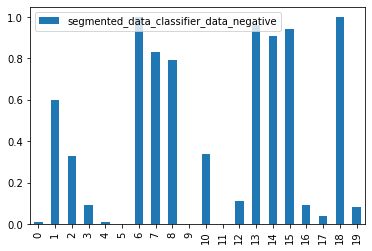

In [ ]:
dataframe[['segmented_data_classifier_data_negative']].astype('float').plot.bar()